In [122]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tables
import matplotlib as mpl

mpl.rcParams["font.size"] = 16

In [12]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4.hdf5"

In [113]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4_h10km.hdf5"
with tables.open_file(path) as h5file:
    result = []
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        print(repr(table.attrs))
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 29 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 175,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml ../SpaceCraftFullAtmosphere.gdml\n/npm/thunderstorm/physics FTFP_BERT_opt4\n/npm/thunderstorm/minimal_energy 10.0 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma true\n/npm/thunderstorm/stacking/save_gamma false\n/npm/thu

In [124]:
def get_data(path):
    with tables.open_file(path) as h5file:
        result = []
        n = 0
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            number = table.attrs["values_macros_number"]
            n += number
            data = table.read()
            result.append(data)
        return np.hstack(result), 1.0/n

In [118]:
def plot_z_hist(data, name="air.png", weight = 1):
    indx = data["z"] < 800000

    plt.hist(data["z"][indx]/1000, weights=weight*np.ones(np.sum(indx)))
    plt.yscale("log")
    plt.xlabel("Высота, км")
    plt.ylabel("Число нейтронов")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)
    print("Отношение рожденных в корабле к рожденным в атмосфере: {}".format(np.sum(np.logical_not(indx))/np.sum(indx)))

In [175]:
def plot_spacecraft(data, name="solid.png", weight = 1):
    indx = data["z"] > 880000
    data = data["z"][indx]-880000
    data = data[data < 500]
    plt.hist(data, weights=weight*np.ones(data.size))
    plt.yscale("log")
    plt.xlabel("Толщина детектора, метры")
    plt.ylabel("Число нейтронов")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)

In [159]:
def plot_radius(data, name="solid.png", weight = 1):
    indx = data["z"] < 880000
    radius = 1
    data_air = data["radius"][indx]
    indx1 = data_air < radius
    data_air = data_air[indx1]
    plt.hist(data_air, bins=100)
    plt
    # data_solid = data["radius"][np.logical_not(indx)]
    # indx1 = data_solid < radius
    # data_solid = data_solid[indx1]
    # plt.hist(data_solid, density=True, bins=100)
    plt.xlabel("Разброс, метры")
    plt.ylabel("Доля нейтронов")
    plt.tight_layout()
    # plt.savefig(name, fmt="png", dpi=600, transparent=True)


In [96]:
def plot_ratio(data, thickness = 100, name="ratio.png"):
    indx = data["z"] < 880000
    n_air = np.sum(indx)
    data = data["z"][np.logical_not(indx)] - 880000
    data = data[data <  thickness ]
    bins=np.arange(0,  thickness + 1 , 1)
    hist, _ = np.histogram(data, bins=bins)
    data = np.cumsum(hist)
    plt.grid(True)
    plt.plot(bins[:-1], data/n_air)
    plt.xlabel("Толщина детектора, метры")
    plt.ylabel("Отношение рожденных в детекторе\n к рожденным в атмосфере")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)

In [216]:
def get_data_tracking(path):
    with tables.open_file(path) as h5file:
        result = []
        n = 0
        for group in h5file.root:
            table = h5file.get_node(group, "tracking_post")
            number = table.attrs["values_macros_number"]
            n += number
            data = table.read()
            result.append(data)
        return np.hstack(result), 1.0/n


In [125]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
data, weight = get_data(path)

Отношение рожденных в корабле к рожденным в атмосфере: 29.294418604651163


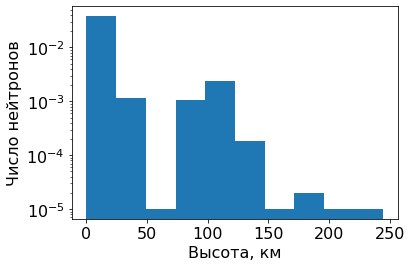

In [126]:
plot_z_hist(data, weight=weight)

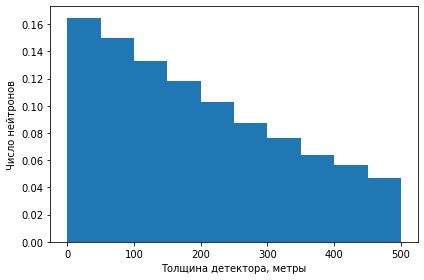

In [99]:
plot_spacecraft(data, weight=1e-5)

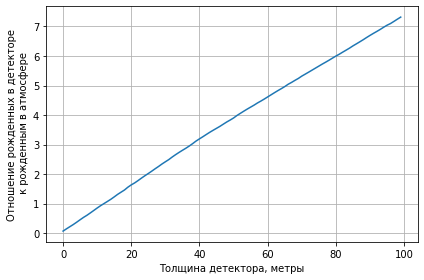

In [100]:
plot_ratio(data)

(array([3.131e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.00593557, 0.01187115, 0.01780672, 0.0237423 ,
        0.02967787, 0.03561344, 0.04154902, 0.04748459, 0.05342016,
        0.05935574]),
 <a list of 10 Patch objects>)

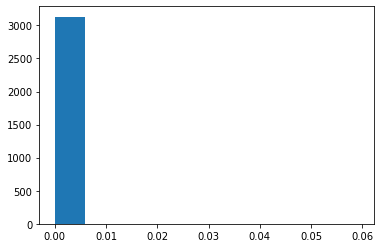

(array([1.25905e+05, 0.00000e+00, 2.00000e+00, 5.00000e+00, 1.00000e+00,
        8.00000e+00, 1.30000e+01, 6.00000e+00, 9.00000e+00, 1.70000e+01]),
 array([  0.        ,  38.8564637 ,  77.7129274 , 116.5693911 ,
        155.4258548 , 194.2823185 , 233.13878219, 271.99524589,
        310.85170959, 349.70817329, 388.56463699]),
 <a list of 10 Patch objects>)

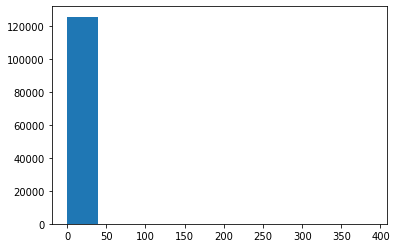

In [104]:
plt.hist(data["radius"][np.logical_not(indx)]/1000)


In [222]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4_h15km.hdf5"
data_opt4, weight = get_data(path)

In [217]:
data_tr_opt4, weight = get_data_tracking(path)

Отношение рожденных в корабле к рожденным в атмосфере: 0.07946635730858469


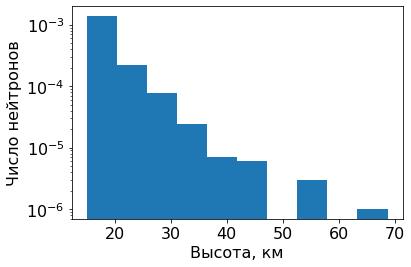

In [167]:
plot_z_hist(data_opt4, weight=weight)

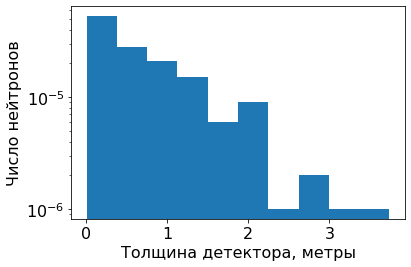

In [176]:
plot_spacecraft(data_opt4,  weight=weight)

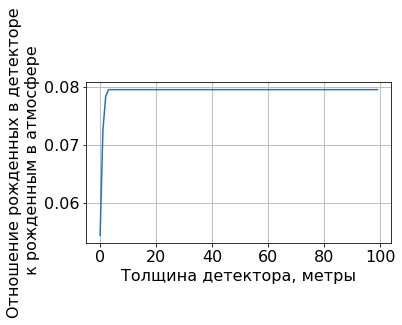

In [177]:
plot_ratio(data_opt4)

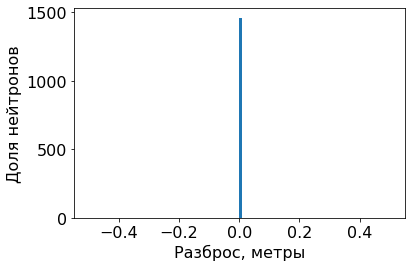

In [160]:
plot_radius(data_opt4, weight=weight)



In [189]:
indx1 = data_opt4["z"] < 800000

(array([ 59., 181., 211., 269., 274., 258., 190., 158.,  93.,  31.]),
 array([0.01960048, 0.33071919, 0.6418379 , 0.9529566 , 1.26407531,
        1.57519401, 1.88631272, 2.19743143, 2.50855013, 2.81966884,
        3.13078755]),
 <a list of 10 Patch objects>)

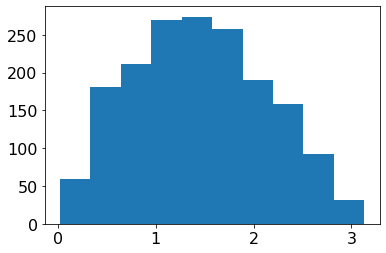

In [227]:
plt.hist(data_opt4["theta"][indx1])

Text(0, 0.5, 'Разброс, километры')

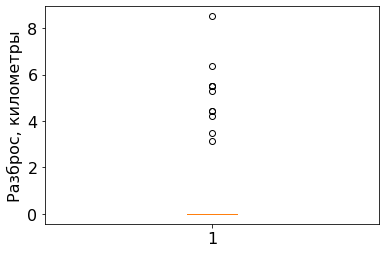

In [208]:
indx = np.logical_and(indx1, data_opt4["radius"]<10)
plt.boxplot(data_opt4["radius"][indx])
plt.ylabel("Разброс, километры")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc2613d01d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc2613cb250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc26138e210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc2613cb350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc2613b5710>],
 'means': []}

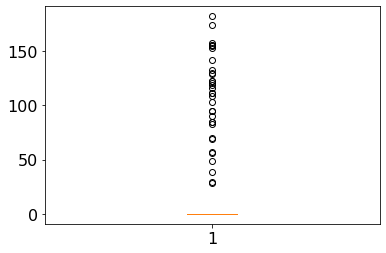

In [201]:
plt.boxplot(data_opt4["radius"][np.logical_not(indx1)]/1000)

In [192]:
plt.scatter(data_opt4["z"][np.logical_not(indx1)]/1000)

TypeError: scatter() missing 1 required positional argument: 'y'

In [195]:
data_opt4["z"][np.logical_not(indx1)]/1000

array([880.00008605, 880.00107208, 880.00040755, 880.00040755,
       880.00083403, 880.00083403, 880.00014243, 880.00064624,
       880.00064624, 880.00076925, 880.00135667, 880.00100966,
       880.00126887, 880.00023925, 880.00000992, 880.00063421,
       880.0010759 , 880.00188045, 880.00188045, 880.00104949,
       880.00022711, 880.00034336, 880.00208207, 880.00208207,
       880.0004356 , 880.00130514, 880.00043594, 880.00138614,
       880.0010212 , 880.0010212 , 880.00075472, 880.00075472,
       880.00014798, 880.00153643, 880.0031155 , 880.00046621,
       880.00025183, 880.00025183, 880.00010073, 880.00118534,
       880.00118534, 880.00213797, 880.0015276 , 880.00374145,
       880.00035563, 880.00265343, 880.00004614, 880.00004614,
       880.00159338, 880.00159338, 880.00143291, 880.00143291,
       880.00013593, 880.00013593, 880.00125575, 880.00037509,
       880.00002878, 880.00126865, 880.00071648, 880.00012414,
       880.00031223, 880.00064048, 880.00002225, 880.00

In [211]:
(data_opt4["radius"]<1).sum()

1448

In [213]:
np.unique(data_opt4["radius"], return_counts=True)

(array([0.00000000e+00, 1.81504843e-02, 3.38916622e-02, 4.07097902e-02,
        6.84665136e-02, 9.35224661e-02, 1.51615874e-01, 1.56370393e-01,
        3.43236430e-01, 3.43621037e-01, 3.44498764e-01, 3.15389129e+00,
        3.48865305e+00, 4.20479988e+00, 4.43300579e+00, 5.30273744e+00,
        5.50105583e+00, 5.52043328e+00, 6.34597220e+00, 8.50885245e+00,
        1.26939518e+01, 1.53924203e+01, 1.63361815e+01, 1.70597379e+01,
        1.82650009e+01, 2.26384102e+01, 2.27604502e+01, 2.46942172e+01,
        2.65655047e+01, 2.90192930e+01, 3.02842475e+01, 3.17410416e+01,
        3.35946707e+01, 3.44746577e+01, 3.51888835e+01, 3.55117703e+01,
        3.58559695e+01, 3.66888174e+01, 3.81061477e+01, 3.92877689e+01,
        3.95180681e+01, 3.96665009e+01, 4.22867481e+01, 4.73751219e+01,
        4.77476472e+01, 5.25813419e+01, 5.29132546e+01, 5.31900360e+01,
        5.36236406e+01, 5.40317483e+01, 5.69136718e+01, 5.76362645e+01,
        5.83435211e+01, 5.87131742e+01, 6.04095788e+01, 6.257299

In [214]:
100*(1438/1700)

84.58823529411764

(array([3.96900e+03, 3.28000e+02, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.25966e+05]),
 array([3.39482923e+00, 8.83145727e+04, 1.76625751e+05, 2.64936928e+05,
        3.53248106e+05, 4.41559284e+05, 5.29870462e+05, 6.18181640e+05,
        7.06492818e+05, 7.94803996e+05, 8.83115174e+05]),
 <a list of 10 Patch objects>)

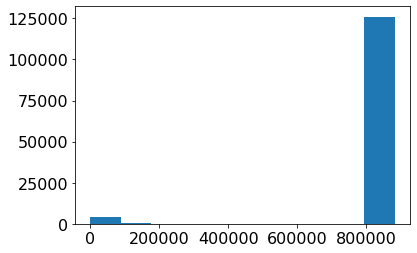

In [220]:
plt.hist(data["z"])

In [221]:
((data["z"]<800000).sum())/1e6

0.0043

In [223]:
data_opt4["z"].min()

15000.972589615081

In [224]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4_h15km_e15MeV.hdf5"
data_opt4_15, weight = get_data(path)


Отношение рожденных в корабле к рожденным в атмосфере: 0.0


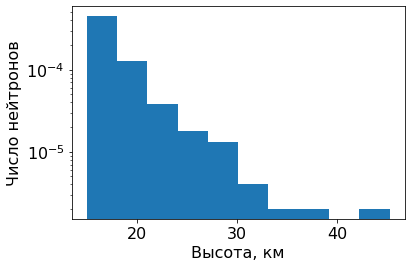

In [225]:
plot_z_hist(data_opt4_15, weight=weight, name="air15.png")


In [229]:
(data_opt4_15["z"] < 80000).sum()

659

In [230]:
data_tr_opt4_15, weight = get_data_tracking(path)

In [235]:

(data_tr_opt4_15["z"] > 800000).sum()/1e4

5.1931

In [234]:
(data_tr_opt4_15["z"] < 800000).sum()

948897

(array([ 29.,  54.,  69.,  81.,  97., 103.,  91.,  73.,  36.,  26.]),
 array([0.08882005, 0.39154634, 0.69427264, 0.99699893, 1.29972522,
        1.60245151, 1.9051778 , 2.2079041 , 2.51063039, 2.81335668,
        3.11608297]),
 <a list of 10 Patch objects>)

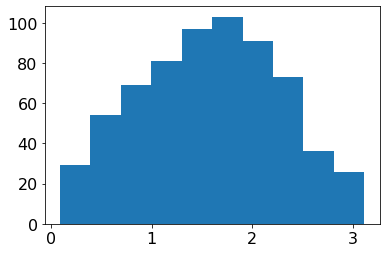

In [236]:
plt.hist(data_opt4_15["theta"] )

In [237]:

(1 - (1/1.05)**2)**0.5

0.3049106779729929

(array([452., 128.,  38.,  18.,  13.,   4.,   2.,   2.,   0.,   2.]),
 array([1.55134564e-02, 1.01057774e+01, 2.01960413e+01, 3.02863052e+01,
        4.03765691e+01, 5.04668330e+01, 6.05570970e+01, 7.06473609e+01,
        8.07376248e+01, 9.08278887e+01, 1.00918153e+02]),
 <a list of 10 Patch objects>)

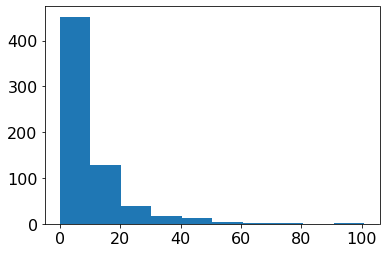

In [239]:
plt.hist(data_opt4_15["time"]/1000 )